In [1]:
import pandas as pd
import numpy as np
from pycaret.anomaly import *
from dfply import *
from seaborn import heatmap
import matplotlib.pyplot as plt

In [6]:
df1 = pd.read_csv('./34.2.e_w.2_23062021_fcdSpeedMatrix.csv')
df2 = pd.read_csv('./34.2.e_w.2_24062021_fcdSpeedMatrix.csv')
df3 = pd.read_csv('./34.2.e_w.2_25062021_fcdSpeedMatrix.csv')
df4 = pd.read_csv('./34.2.e_w.2_26062021_fcdSpeedMatrix.csv')
df5 = pd.read_csv('./34.2.e_w.2_27062021_fcdSpeedMatrix.csv')
df6 = pd.read_csv('./34.2.e_w.2_28062021_fcdSpeedMatrix.csv')

the = [df1, df2, df3, df6]
for i in the:
    i = i.dropna(axis=0)
    i = i.reset_index(drop=1)
    i = pd.pivot_table(i, values=['length', 'speed'], index='discoveryTime', 
                        aggfunc={
                            'length':list,
                            'speed':list
                        })

    i.head()
    i.shape
    i = i[i.speed.map(len) == 8080]
    namesi = i.length[0]
    indexesi = i.index
    i = pd.DataFrame([pd.Series(x) for x in i.speed], index=indexesi)
    i.columns = namesi
    i.head()
    f, ax = plt.subplots(figsize=(16, 12))
    heatmap(i.T, ax=ax, cmap='magma')

In [42]:
df1.head()

,discoveryTime,length,speed
0,2021-06-23 07:08:00,1,NaN
1,2021-06-23 07:08:00,2,NaN
2,2021-06-23 07:08:00,3,NaN
3,2021-06-23 07:08:00,4,NaN
4,2021-06-23 07:08:00,5,NaN


In [56]:
df_train = pd.concat([df1, df2, df3, df6])

In [57]:
df_train = df_train.dropna(axis=0)

In [58]:
df_train = df_train.reset_index(drop=1)

In [59]:
df_train = pd.pivot_table(df_train, values=['length', 'speed'], index='discoveryTime', 
                    aggfunc={
                        'length':list,
                        'speed':list
                    })

In [60]:
df_train.head()

,length,speed
discoveryTime,,
2021-06-23 07:08:00,"[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[58.2, 58.4, 58.7, 59.0, 59.3, 59.6, 59.9, 60...."
2021-06-23 07:09:00,"[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[50.25, 50.65, 51.0, 51.4, 51.75, 52.2, 52.55,..."
2021-06-23 07:10:00,"[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[53.7, 54.0, 54.3, 54.6, 54.9, 55.2, 55.5, 55...."
2021-06-23 07:11:00,"[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[50.25, 50.65, 51.1, 51.45, 51.9, 52.25, 52.7,..."
2021-06-23 07:12:00,"[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[46.3, 46.9, 47.5, 48.0, 48.6, 49.1, 49.7, 50...."


In [61]:
df_train.shape

(2930, 2)

In [62]:
#removes 47 rows
df_train = df_train[df_train.speed.map(len) == 8080]

In [63]:
names = df_train.length[0]
indexes = df_train.index
df_train = pd.DataFrame([pd.Series(x) for x in df_train.speed], index=indexes)
df_train.columns = names

In [64]:
df_train.shape

(2693, 8080)

In [65]:
df_train.head()

,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,...,7850,7851,7852,7853,7854,7855,7856,7857,7858,7859,7860,7861,7862,7863,7864,7865,7866,7867,7868,7869,7870,7871,7872,7873,7874,7875,7876,7877,7878,7879,7880,7881,7882,7883,7884,7885,7886,7887,7888,7889,7890,7891,7892,7893,7894,7895,7896,7897,7898,7899,7900,7901,7902,7903,7904,7905,7906,7907,7908,7909,7910,7911,7912,7913,7914,7915,7916,7917,7918,7919,7920,7921,7922,7923,7924,7925,7926,7927,7928,7929,7930,7931,7932,7933,7934,7935,7936,7937,7938,7939,7940,7941,7942,7943,7944,7945,7946,7947,7948,7949,7950,7951,7952,7953,7954,7955,7956,7957,7958,7959,7960,7961,7962,7963,7964,7965,7966,7967,7968,7969,7970,7971,7972,7973,7974,7975,7976,7977,7978,7979,7980,7981,7982,7983,7984,7985,7986,7987,7988,7989,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999,8000,8001,8002,8003,8004,8005,8006,8007,8008,8009,8010,8011,8012,8013,8014,8015,8016,8017,8018,8019,8020,8021,8022,8023,8024,8025,8026,8027,8028,8029,8030,8031,8032,8033,8034,8035,8036,8037,8038,8039,8040,8041,8042,8043,8044,8045,8046,8047,8048,8049,8050,8051,8052,8053,8054,8055,8056,8057,8058,8059,8060,8061,8062,8063,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
discoveryTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-23 07:09:00,50.25,50.65,51.0,51.40,51.75,52.20,52.55,52.95,53.3,53.70,54.1,54.50,54.85,55.25,55.60,56.05,56.40,56.80,57.15,57.55,57.95,58.35,58.70,59.10,59.45,59.9,60.25,60.65,61.0,61.4,61.80,62.2,62.55,62.95,63.35,63.75,64.10,64.50,64.85,65.30,65.65,66.05,66.4,66.50,66.55,66.55,66.6,66.60,66.65,66.65,66.65,66.7,66.70,66.75,66.75,66.8,66.80,66.8,66.85,66.85,66.90,66.90,66.95,66.95,67.0,67.00,67.0,67.05,67.05,67.10,67.1,67.15,67.15,67.15,67.20,67.2,67.25,67.25,67.30,67.3,67.35,67.35,67.35,67.40,67.4,67.45,67.45,67.50,67.5,67.5,67.50,67.55,67.55,67.55,67.55,67.60,67.6,67.6,67.60,67.60,67.65,67.65,67.65,67.65,67.70,67.7,67.7,67.70,67.75,67.75,67.75,67.75,67.75,67.80,67.8,67.8,67.80,67.85,67.85,67.85,67.85,67.85,67.90,67.9,67.9,67.90,67.95,67.95,67.95,67.95,67.95,68.00,68.0,68.0,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.0,68.0,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.0,68.0,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.0,68.0,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.0,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.0,68.0,68.00,67.95,67.95,67.95,67.95,67.90,67.9,67.9,67.9,67.90,67.85,67.85,67.85,67.85,67.80,67.8,67.8,67.8,67.80,67.75,67.75,67.75,67.75,67.70,67.7,67.7,67.70,67.70,67.65,67.65,67.65,67.65,67.60,67.6,67.6,67.60,67.60,67.55,67.55,67.55,67.55,67.50,67.5,67.5,67.

<AxesSubplot:xlabel='discoveryTime'>

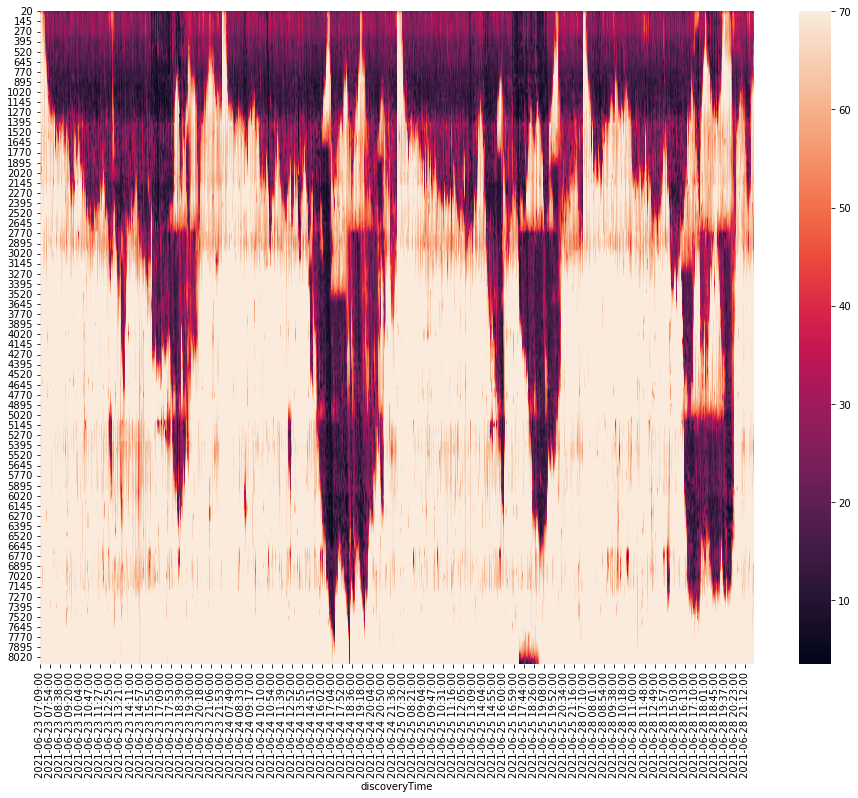

In [66]:
f, ax = plt.subplots(figsize=(16, 12))
heatmap(df_train.T, ax=ax)

In [67]:
df_train = df_train.groupby((np.arange(len(df_train.columns)) // 100) + 1, axis=1).mean()

In [68]:
df_train.shape

(2693, 81)

<AxesSubplot:xlabel='discoveryTime'>

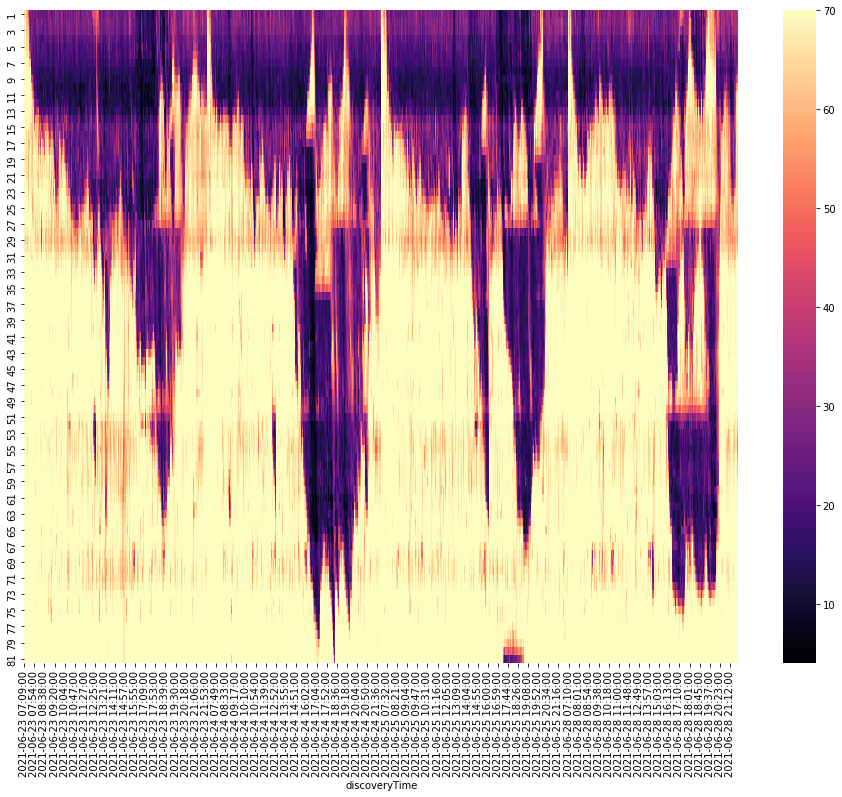

In [69]:
plt.figure(figsize=(16,12))
heatmap(df_train.T, cmap='magma')

In [70]:
df_train = df_train.reset_index(drop=0)

In [71]:
df_train = df_train.melt(id_vars=['discoveryTime'], var_name='length', value_name='speed')

In [72]:
df_train.shape

(218133, 3)

In [73]:
setup(df_train, categorical_features=['length'], numeric_features=['speed'],
      date_features=['discoveryTime'], silent=True, session_id=6973)

,Description,Value
0,session_id,6973
1,Original Data,"(218133, 3)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(218133, 104)"
9,CPU Jobs,-1


({},
 None,
 False,
 None,
             speed  length_1.0  length_10.0  length_11.0  length_12.0  \
 0       63.338501         1.0          0.0          0.0          0.0   
 1       64.414497         1.0          0.0          0.0          0.0   
 2       63.264000         1.0          0.0          0.0          0.0   
 3       63.195000         1.0          0.0          0.0          0.0   
 4       67.445000         1.0          0.0          0.0          0.0   
 ...           ...         ...          ...          ...          ...   
 218128  70.000000         0.0          0.0          0.0          0.0   
 218129  70.000000         0.0          0.0          0.0          0.0   
 218130  70.000000         0.0          0.0          0.0          0.0   
 218131  70.000000         0.0          0.0          0.0          0.0   
 218132  70.000000         0.0          0.0          0.0          0.0   
 
         length_13.0  length_14.0  length_15.0  length_16.0  length_17.0  ...  \
 0            

In [74]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [75]:
pca = create_model('iforest', fraction=0.15)

(763, 8080) (724, 8080)


<AxesSubplot:xlabel='discoveryTime'>

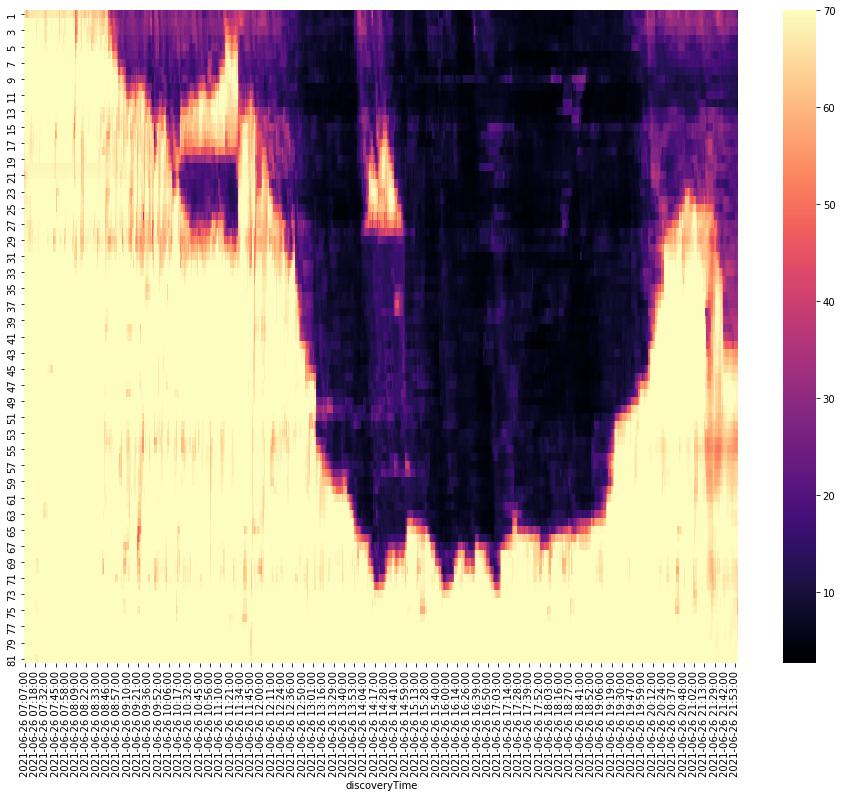

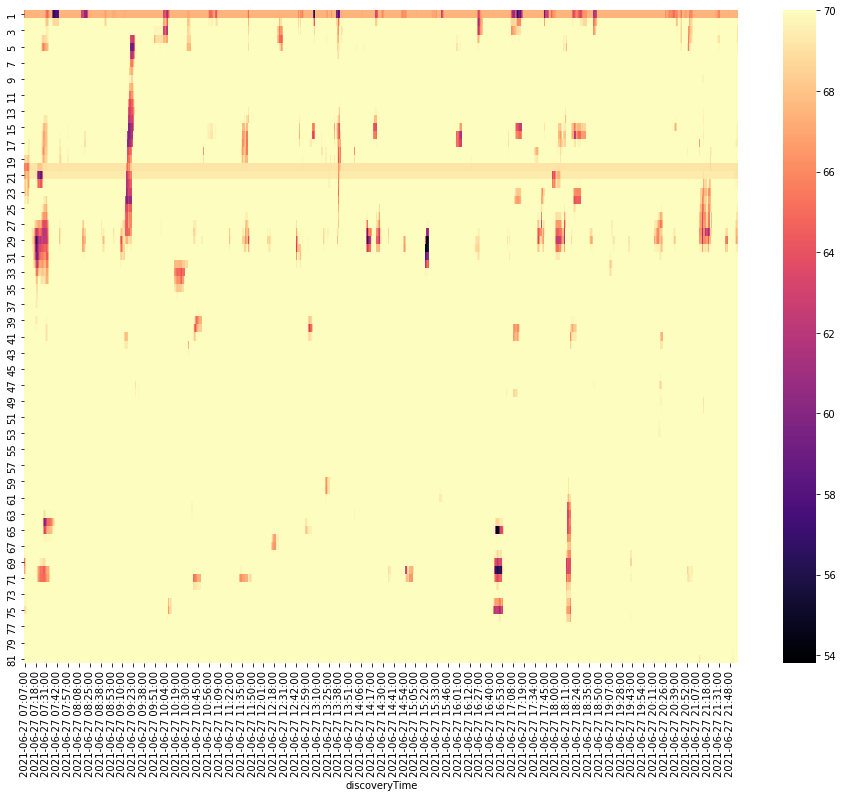

In [23]:
df4 = pd.read_csv('./34.2.e_w.2_26062021_fcdSpeedMatrix.csv')
df5 = pd.read_csv('./34.2.e_w.2_27062021_fcdSpeedMatrix.csv')
df4 = df4.dropna(axis=0)
df5 = df5.dropna(axis=0)
df4 = df4.reset_index(drop=1)
df5 = df5.reset_index(drop=1)
df4 = pd.pivot_table(df4, values=['length', 'speed'], index='discoveryTime', 
                    aggfunc={
                        'length':list,
                        'speed':list
                    })
df5 = pd.pivot_table(df5, values=['length', 'speed'], index='discoveryTime', 
                    aggfunc={
                        'length':list,
                        'speed':list
                    })
df4 = df4[df4.speed.map(len)==8080]
df5 = df5[df5.speed.map(len)==8080]
names4 = df4.length[0]
indexes4 = df4.index
df4 = pd.DataFrame([pd.Series(x) for x in df4.speed], index=indexes4)
df4.columns = names4

names5 = df5.length[0]
indexes5 = df5.index
df5 = pd.DataFrame([pd.Series(x) for x in df5.speed], index=indexes5)
df5.columns = names5
print(df4.shape, df5.shape)
df4 = df4.groupby((np.arange(len(df4.columns)) // 100) + 1, axis=1).mean()
df5 = df5.groupby((np.arange(len(df5.columns)) // 100) + 1, axis=1).mean()
plt.figure(figsize=(16,12))
heatmap(df4.T, cmap='magma')
plt.figure(figsize=(16,12))
heatmap(df5.T, cmap='magma')

In [53]:
test1 = pd.read_csv('./34.2.e_w.2_21062021_fcdSpeedMatrix2.csv')
test2 = pd.read_csv('./34.2.e_w.2_22062021_fcdSpeedMatrix2.csv')

<AxesSubplot:xlabel='discoveryTime'>

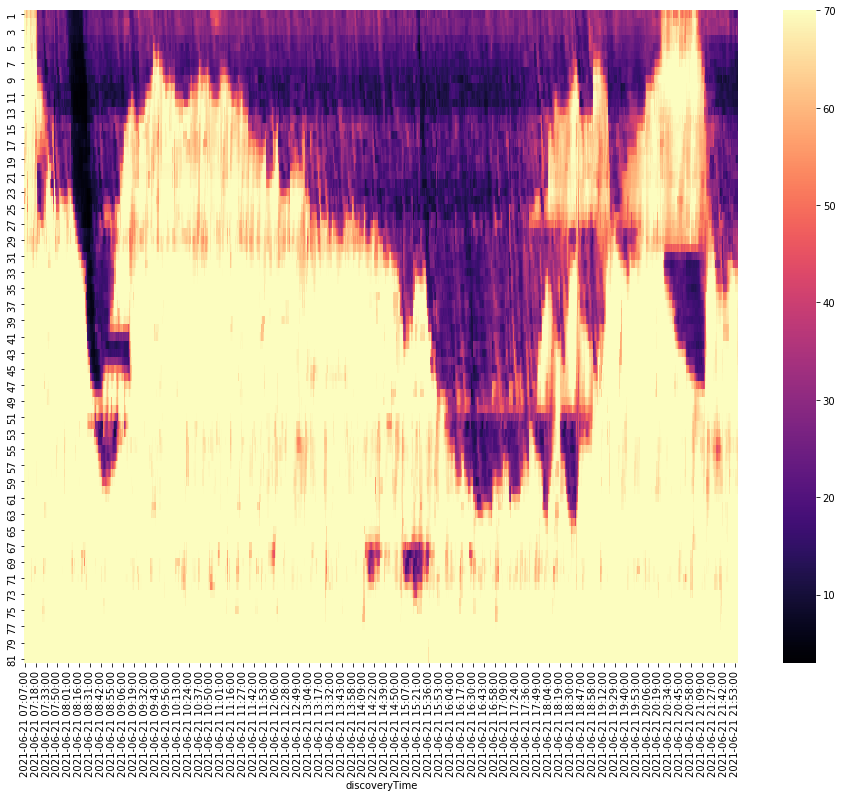

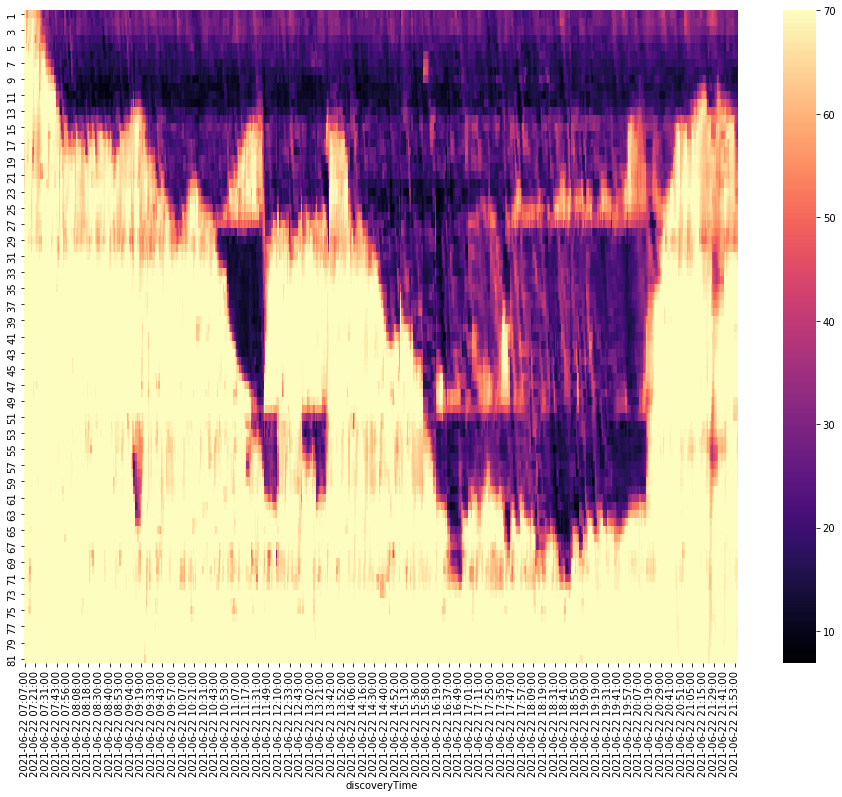

In [54]:
test1 = test1.dropna(axis=0)
test2 = test2.dropna(axis=0)
test1 = test1.reset_index(drop=1)
test2 = test2.reset_index(drop=1)
test1 = pd.pivot_table(test1, values=['length', 'speed'], index='discoveryTime', 
                    aggfunc={
                        'length':list,
                        'speed':list
                    })
test2 = pd.pivot_table(test2, values=['length', 'speed'], index='discoveryTime', 
                    aggfunc={
                        'length':list,
                        'speed':list
                    })
test1 = test1[test1.speed.map(len)==8080]
test2 = test2[test2.speed.map(len)==8080]
names4 = test1.length[0]
indexes4 = test1.index
test1 = pd.DataFrame([pd.Series(x) for x in test1.speed], index=indexes4)
test1.columns = names4

names5 = test2.length[0]
indexes5 = test2.index
test2 = pd.DataFrame([pd.Series(x) for x in test2.speed], index=indexes5)
test2.columns = names5
test1 = test1.groupby((np.arange(len(test1.columns)) // 100) + 1, axis=1).mean()
test2 = test2.groupby((np.arange(len(test2.columns)) // 100) + 1, axis=1).mean()
plt.figure(figsize=(16,12))
heatmap(test1.T, cmap='magma')
plt.figure(figsize=(16,12))
heatmap(test2.T, cmap='magma')


In [55]:
test1 = test1.reset_index(drop=0)
test2 = test2.reset_index(drop=0)
test1 = test1.melt(id_vars=['discoveryTime'], var_name='length', value_name='speed')
test2 = test2.melt(id_vars=['discoveryTime'], var_name='length', value_name='speed')

In [56]:
test_res1 = predict_model(pca, test1)
test_res2 = predict_model(pca, test2)

In [57]:
test_res1 = test_res1.drop('Anomaly_Score', axis=1)
test_res2 = test_res2.drop('Anomaly_Score', axis=1)

In [58]:
test_res1.head()

,discoveryTime,length,speed,Anomaly
0,2021-06-21 07:07:00,1,67.445,0
1,2021-06-21 07:08:00,1,66.807,0
2,2021-06-21 07:09:00,1,60.571,0
3,2021-06-21 07:10:00,1,63.475,0
4,2021-06-21 07:11:00,1,66.592,0


In [32]:
test_res1 = pd.pivot_table(test_res1, values=['length', 'speed', 'Anomaly'], index='discoveryTime', 
                    aggfunc={
                        'length':list,
                        'speed':list,
                        'Anomaly': list
                    })
test_res2 = pd.pivot_table(test_res2, values=['length', 'speed', 'Anomaly'], index='discoveryTime', 
                    aggfunc={
                        'length':list,
                        'speed':list,
                        'Anomaly': list
                    })

In [33]:
names1 = test_res1.length[0]
indexes1 = test_res1.index
test_res1 = pd.DataFrame([pd.Series(x) for x in test_res1.Anomaly], index=indexes1)
test_res1.columns = names1

names2 = test_res2.length[0]
indexes2 = test_res2.index
test_res2 = pd.DataFrame([pd.Series(x) for x in test_res2.Anomaly], index=indexes2)
test_res2.columns = names2


<AxesSubplot:xlabel='discoveryTime'>

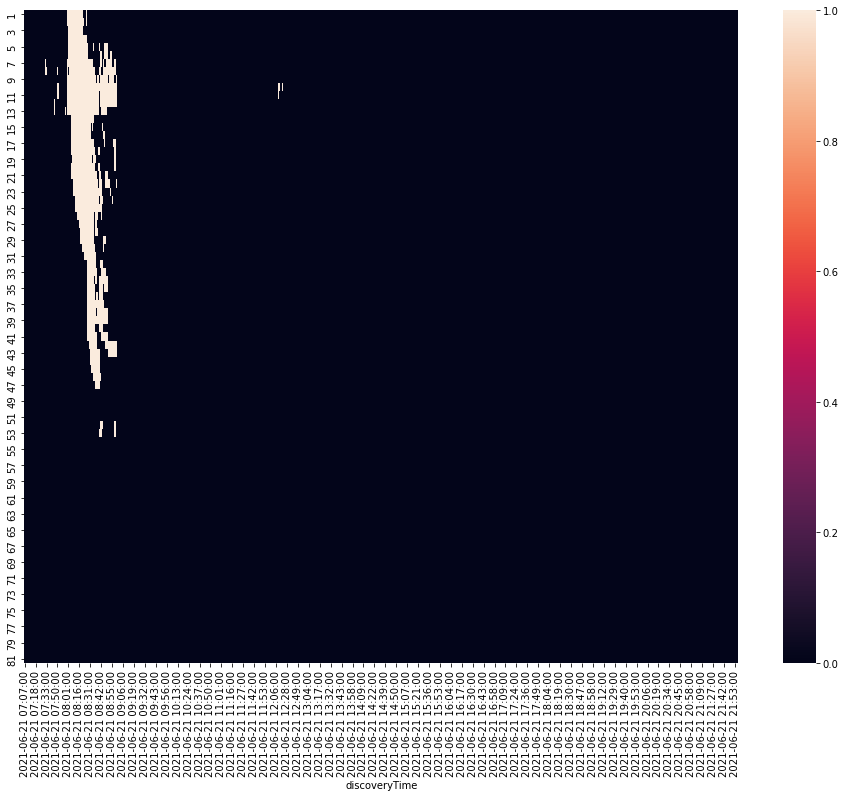

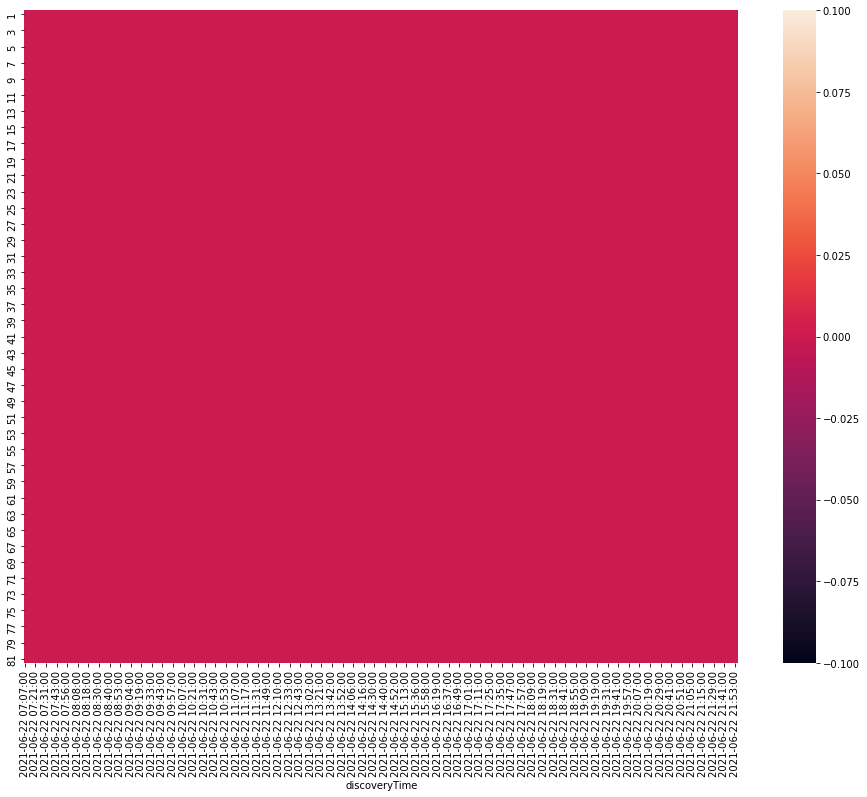

In [34]:
plt.figure(figsize=(16,12))
heatmap(test_res1.T)
plt.figure(figsize=(16,12))
heatmap(test_res2.T)

In [37]:
save_model(pca, 'highligter')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['length'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['speed'],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=['discoveryTime'])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  IForest(behaviour='new', bootstrap=Fa

In [2]:
pca = load_model('./highligter')

Transformation Pipeline and Model Successfully Loaded


In [3]:
import sqlalchemy
database_username = 'user'
database_password = 'user2001'
database_ip       = 'localhost'
database_name     = 'db'
con = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))

In [4]:
import time
import datetime

In [8]:
test1

,discoveryTime,length,speed
0,2021-06-21 07:07:00,1,67.445
1,2021-06-21 07:08:00,1,66.807
2,2021-06-21 07:09:00,1,60.571
3,2021-06-21 07:10:00,1,63.475
4,2021-06-21 07:11:00,1,66.592
...,...,...,...
58234,2021-06-21 21:52:00,81,70.000
58235,2021-06-21 21:53:00,81,70.000
58236,2021-06-21 21:54:00,81,70.000
58237,2021-06-21 21:55:00,81,70.000


In [9]:
test1.to_sql('df', con=con, if_exists='replace')

In [61]:
n = 0
while 1:
    x = (datetime.datetime.strptime('2021-06-21 07:07:00', '%Y-%m-%d %H:%M:%S') + datetime.timedelta(minutes=1)*n).strftime('%Y-%m-%d %H:%M:%S')
    d = pd.DataFrame(con.execute(f"SELECT * FROM df WHERE discoveryTime = '{x}' ORDER BY length DESC").fetchall())
    if len(d) == 0:
        n += 1
        continue
    d.columns = ['index', 'discoveryTime', 'length', 'speed']
    d = d.drop('index', axis=1)
    dd = predict_model(pca, d)
    if 1 in dd.Anomaly.tolist():
        a = dd.Anomaly[dd.Anomaly == 1]
        start = a.index[0]+1
        end = a.index[-1]+1
        lend = len(dd.Anomaly[dd.Anomaly == 1])
        if end - start + 1 != lend:
            print('YES', 'with length:', lend, 'on date:', dd.discoveryTime[0], 'on lengths:', start, '-', end, 'SEPERATE!')
        else:
            print('YES', 'with length:', lend, 'on date:', dd.discoveryTime[0], 'on lengths:', start, '-', end)
    n += 1

YES with length: 2 on date: 2021-06-21 07:32:00 on lengths: 74 - 75
YES with length: 1 on date: 2021-06-21 07:33:00 on lengths: 74 - 74
YES with length: 2 on date: 2021-06-21 07:45:00 on lengths: 69 - 70
YES with length: 3 on date: 2021-06-21 07:50:00 on lengths: 71 - 74 SEPERATE!
YES with length: 2 on date: 2021-06-21 07:51:00 on lengths: 71 - 72
YES with length: 1 on date: 2021-06-21 07:58:00 on lengths: 69 - 69
YES with length: 9 on date: 2021-06-21 08:00:00 on lengths: 69 - 81 SEPERATE!
YES with length: 12 on date: 2021-06-21 08:01:00 on lengths: 69 - 81 SEPERATE!
YES with length: 13 on date: 2021-06-21 08:02:00 on lengths: 69 - 81
YES with length: 13 on date: 2021-06-21 08:03:00 on lengths: 69 - 81
YES with length: 20 on date: 2021-06-21 08:06:00 on lengths: 61 - 81 SEPERATE!
YES with length: 21 on date: 2021-06-21 08:07:00 on lengths: 61 - 81
YES with length: 23 on date: 2021-06-21 08:10:00 on lengths: 59 - 81
YES with length: 23 on date: 2021-06-21 08:11:00 on lengths: 59 - 81
Y

KeyboardInterrupt: 